Maestría en Analítica de Datos

Formulación de proyectos

Taller Práctico

Presentado por:

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Averigüe qué hace la librería Scipy y cómo ayuda al EDA

In [3]:
# Cargar la base de datos 'Titanic' de Seaborn
df = sns.load_dataset('titanic')

In [5]:
df

In [6]:
# 1. Inspección inicial de los datos
print("1. Inspección inicial de los datos:")
print(df.head())  # Mostrar las primeras filas del DataFrame
print(df.info())  # Información general sobre el DataFrame
print(df.shape)   # Número de filas y columnas

1. Inspección inicial de los datos:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -

Describa con sus palabras qué datos contiene la base de datos Titanic

In [8]:
# 2. Análisis de valores faltantes
print("\n2. Análisis de valores faltantes:")
print(df.isnull().sum())  # Contar valores faltantes por columna


2. Análisis de valores faltantes:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


¿Hay datos faltantes? ¿Cuáles? ¿Qué puede advertir de la falta de estos datos?

In [10]:
# 3. Identificación de duplicados
print("\n3. Identificación de duplicados:")
print(df.duplicated().sum())  # Contar filas duplicadas


3. Identificación de duplicados:
107


¿Hay datos faltantes? ¿Qué puede advertir de la falta de estos datos? ¿Qué decisión lo lleva a tomar la presencia de datos duplicados?

In [9]:
# 4. Tipos de datos y conversión
print("\n4. Tipos de datos y conversión:")
print(df.dtypes)  # Mostrar los tipos de datos de cada columna


4. Tipos de datos y conversión:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [11]:
# Convertir la columna 'sex' a tipo categórico
df['sex'] = df['sex'].astype('category')
print(df.dtypes)  # Verificar la conversión

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


¿Qué se hizo con esta línea de código? ¿Por qué?


In [12]:
# 5. Estadísticas descriptivas
print("\n5. Estadísticas descriptivas:")
print(df.describe())  # Estadísticas descriptivas para columnas numéricas



5. Estadísticas descriptivas:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Explique la función de cada una de las estadísticas calculadas y... qué muestran los resultados


6. Distribución de variables:


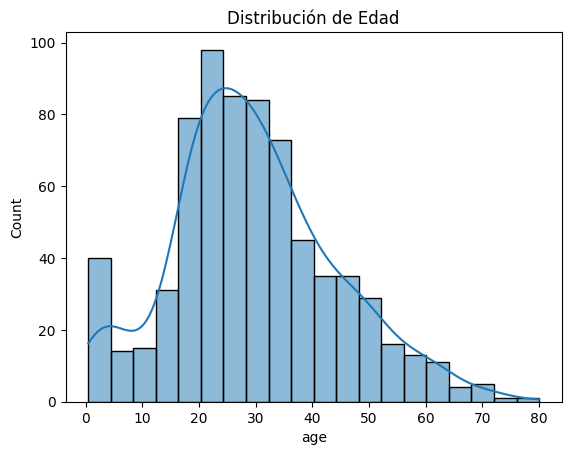

In [13]:
# 6. Distribución de variables
print("\n6. Distribución de variables:")
# Histograma para la edad
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Distribución de Edad')
plt.show()

R**epita el código anterior para todas las variables**


7. Detección de valores atípicos:


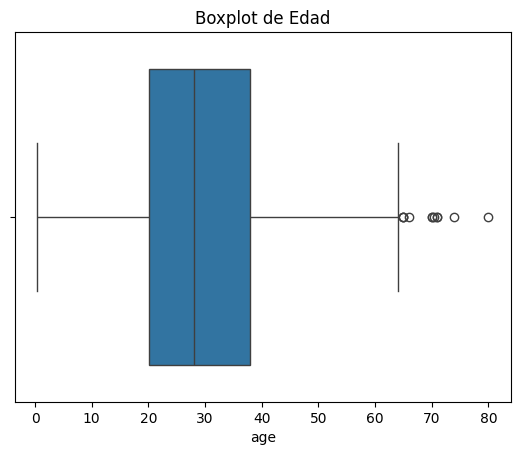

In [14]:
# 7. Detección de valores atípicos
print("\n7. Detección de valores atípicos:")
# Boxplot para la edad
sns.boxplot(x=df['age'])
plt.title('Boxplot de Edad')
plt.show()

R**epita el código anterior para todas las variables**


8. Análisis de correlación:


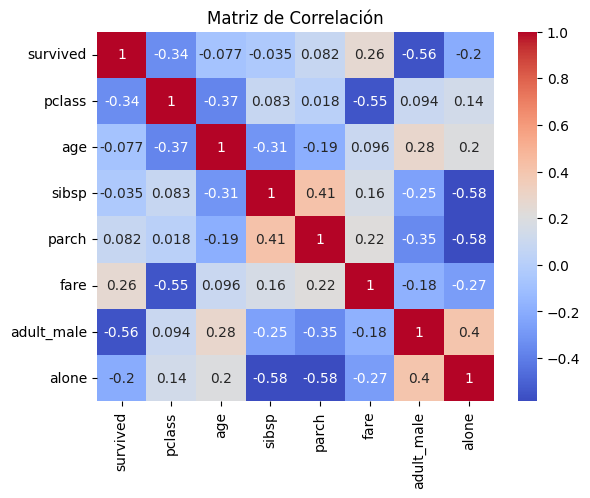

In [15]:
# 8. Análisis de correlación
print("\n8. Análisis de correlación:")
# Matriz de correlación
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

¿Qué puede interpretar de esta correlación?

In [16]:
# 9. Análisis de variables categóricas
print("\n9. Análisis de variables categóricas:")
# Conteo de pasajeros por género
print(df['sex'].value_counts())


9. Análisis de variables categóricas:
sex
male      577
female    314
Name: count, dtype: int64


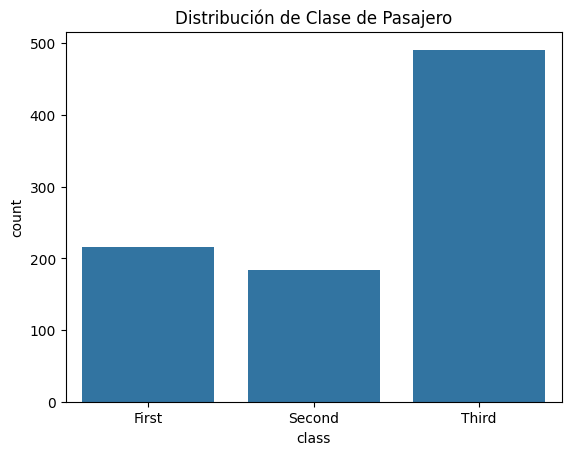

In [17]:
# Gráfico de barras para la clase de pasajero
sns.countplot(x='class', data=df)
plt.title('Distribución de Clase de Pasajero')
plt.show()


10. Creación de visualizaciones clave:


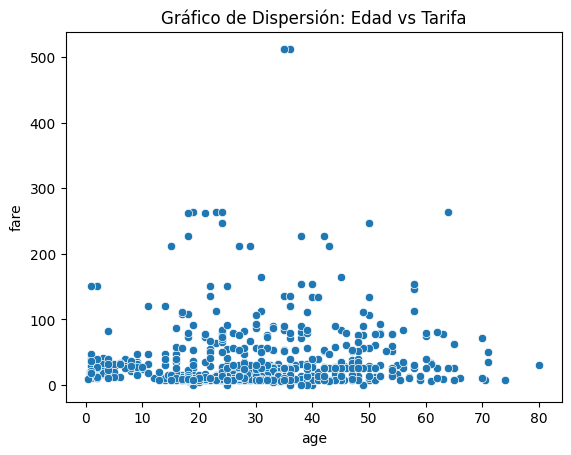

In [18]:
# 10. Creación de visualizaciones clave
print("\n10. Creación de visualizaciones clave:")
# Gráfico de dispersión entre edad y tarifa
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Gráfico de Dispersión: Edad vs Tarifa')
plt.show()

Elabore otras 3 gráficas que considere clave. Seleccione las variables a representar


11. Identificación de relaciones entre variables:


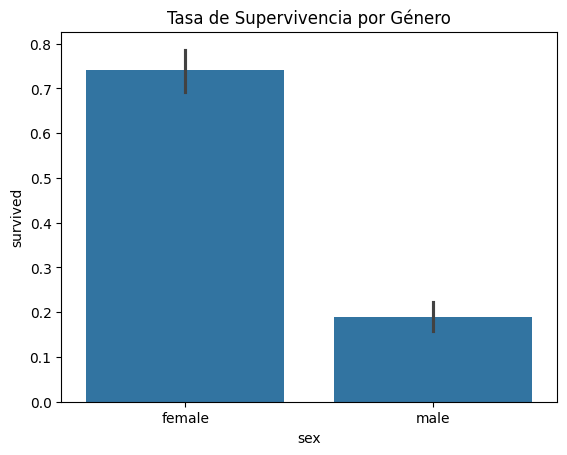

In [19]:
# 11. Identificación de relaciones entre variables
print("\n11. Identificación de relaciones entre variables:")
# Gráfico de barras para la supervivencia por género
sns.barplot(x='sex', y='survived', data=df)
plt.title('Tasa de Supervivencia por Género')
plt.show()


Elabore otras 3 gráficas que considere clave. Seleccione las variables a representar

In [20]:
# 12. Pruebas estadísticas básicas
print("\n12. Pruebas estadísticas básicas:")
# Prueba t para comparar la edad de los sobrevivientes y no sobrevivientes
survived_age = df[df['survived'] == 1]['age'].dropna()
not_survived_age = df[df['survived'] == 0]['age'].dropna()
t_stat, p_value = stats.ttest_ind(survived_age, not_survived_age)
print(f"Prueba t: t-statistic = {t_stat}, p-value = {p_value}")


12. Pruebas estadísticas básicas:
Prueba t: t-statistic = -2.06668694625381, p-value = 0.03912465401348249


Qué miden las pruebas T-Statistic y P-Value ¿qué me quieren decir estos datos?